# Task 3: Predicting Customer Churn (Classification)
# Author: Syed Huzaifa Bin Khamis | Nexus AI Digital Internship

# 1. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Load Dataset

In [22]:
df = pd.read_csv("Telco-Customer-Churn.csv")
print("Initial Shape:", df.shape)

Initial Shape: (7043, 21)


# 3. Data Preprocessing

In [23]:
# Drop customerID
df = df.drop('customerID', axis=1)

# Handle TotalCharges missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# One-Hot Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('Churn_Yes', axis=1)  # 'Churn' becomes 'Churn_Yes' after encoding
y = df['Churn_Yes']

# 4. Train-Test Split

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Scale numerical features

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# 6. Model Evaluation

Accuracy: 0.8070


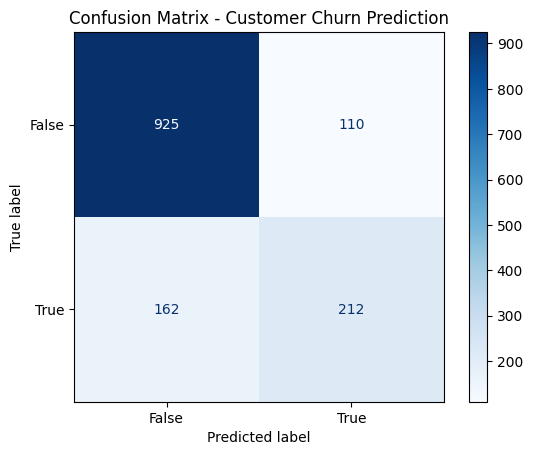

In [27]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Customer Churn Prediction")
plt.show()

# 7. Interpretation

In [28]:
"""
Confusion Matrix Interpretation:
- True Negatives (top-left): Customers correctly predicted to stay.
- False Positives (top-right): Customers predicted to churn but actually stayed (may lead to unnecessary retention cost).
- False Negatives (bottom-left): Customers predicted to stay but actually churned (the most costly error for business).
- True Positives (bottom-right): Customers correctly predicted to churn.

Our goal is to minimize False Negatives (retain actual churners).

"""

'\nConfusion Matrix Interpretation:\n- True Negatives (top-left): Customers correctly predicted to stay.\n- False Positives (top-right): Customers predicted to churn but actually stayed (may lead to unnecessary retention cost).\n- False Negatives (bottom-left): Customers predicted to stay but actually churned (the most costly error for business).\n- True Positives (bottom-right): Customers correctly predicted to churn.\n\nOur goal is to minimize False Negatives (retain actual churners).\n\n'